In [1]:
!unzip /content/spotmentorlabs-machine-learning-assessment-dfe89675d80f.zip

Archive:  /content/spotmentorlabs-machine-learning-assessment-dfe89675d80f.zip
dfe89675d80f0bdb425c38a4e739bb33754d74bf
   creating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/README.md  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/YourName_PhoneNumber.ipynb  
   creating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/
   creating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/5922081.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6523883.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6600981.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6686185.json  
  inflating: spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/6726409.json  
  infl

### Part I: Text Preprocessing

_Include all text preprocesing steps like processing of json,csv files & data cleaning in this part._

Tranforming data into simple CSV form

In [0]:
import pandas as pd
import json
import os

In [3]:
data = pd.read_csv('/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/document_departments.csv')
data.head(5)

Document ID             Department
0      8196431       Customer service
1      8278123      Digital Marketing
2      8331625                  Sales
3      8331003  Back office ticketing
4      8277939      Digital Marketing

In [4]:
data['Department'].value_counts()

Ticketing                          347
Sales                              270
Digital Marketing                  151
Customer service                    69
Marketing                           50
Finance                             42
Operations                          41
Administration                      38
Maintenance                         28
IT                                  20
Back office ticketing               18
Management Consulting               12
Presales                            10
Technology                          10
Analytics                            9
Engineering Design Construction      7
Content                              6
Recruitment                          6
Public Relations                     5
Airline Ground Operations            4
Logistics                            3
Marine Engineering                   3
Data entry                           2
Marine Deck                          2
Marine Service Steward               2
Flight Operations        

In [0]:
dataset=[]
import json
for filename in os.listdir('/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs'):
  path='/content/spotmentorlabs-machine-learning-assessment-dfe89675d80f/data/docs/'+filename
  # print(path)
  f=open(path)
  d = json.load(f)
  f.close()
  dataset.append([int(d['_id']), d['jd_information']['description']])

In [0]:
nd=[ent for ent in dataset if ent[1] != '']

In [7]:
len(nd)

745

In [0]:
df = pd.DataFrame(nd)

In [0]:
df.columns=['Document ID','decription']

In [10]:
df

Document ID                                         decription
0        8278991  We have opening for&nbsp; Store Manager &nbsp;...
1        8208777  Deck Cadet Job Description. Be it on a militar...
2        8331687  Hiring for INTERNATIONAL BPO (call simran-9711...
3        8072903  We need candidates for part time /work from ho...
4        8253293  Dear Candidate ,Greetings from ABM Travels &am...
..           ...                                                ...
740      8305287  Job Description for Visa Assistant1. Candidate...
741      7889695  Dear Candidates,Greetings !&nbsp;We are hiring...
742      8388763  We are looking for a Tax Accountant to prepare...
743      8058909  Handle International Ticketing / Domestics Tic...
744      7881105  Arsenius Skill Capital is Hiring International...

[745 rows x 2 columns]

In [11]:
data

Document ID             Department
0         8196431       Customer service
1         8278123      Digital Marketing
2         8331625                  Sales
3         8331003  Back office ticketing
4         8277939      Digital Marketing
...           ...                    ...
1157      8366382         Administration
1158      8370153                  Sales
1159      8388313              Ticketing
1160      8389315                  Sales
1161      8389347              Ticketing

[1162 rows x 2 columns]

In [0]:
df_n = pd.merge(df,data, on='Document ID')

Our final data is ready in form of csv containing dependent and independent variable

In [13]:
df_n.head(10)

Document ID  ...           Department
0      8278991  ...                Sales
1      8208777  ...  Marine Engineering 
2      8331687  ...     Customer service
3      8072903  ...    Digital Marketing
4      8253293  ...            Ticketing
5      8280309  ...           Operations
6      8370153  ...                Sales
7      8190149  ...                Sales
8      8385953  ...            Ticketing
9      7825919  ...            Ticketing

[10 rows x 3 columns]

In [0]:
df_n['Department'] = pd.Categorical(df_n['Department'])

In [0]:
dfDummies = pd.get_dummies(df_n['Department'], prefix = 'dept')

In [0]:
df_n = pd.concat([df_n, dfDummies], axis=1)

In [0]:
del df_n['Department']

In [18]:
df_n.shape

(745, 29)

In [0]:
df_n['text'] = df_n['decription'].apply(lambda x: x.replace('\n', ' '))

In [0]:
del df_n['decription']

In [21]:
df_n.columns

Index(['Document ID', 'dept_Administration', 'dept_Airline Ground Operations',
       'dept_Analytics', 'dept_Back office ticketing', 'dept_Content',
       'dept_Customer service', 'dept_Data entry', 'dept_Digital Marketing',
       'dept_Engineering Design Construction', 'dept_Finance',
       'dept_Flight Operations', 'dept_IT', 'dept_Learning and Development ',
       'dept_Logistics', 'dept_Maintenance', 'dept_Marine Deck ',
       'dept_Marine Engineering ', 'dept_Marine Service Steward ',
       'dept_Marketing', 'dept_Operations', 'dept_Presales ',
       'dept_Procurement', 'dept_Public Relations ', 'dept_Recruitment',
       'dept_Sales', 'dept_Technology', 'dept_Ticketing', 'text'],
      dtype='object')

In [0]:
df_n['labels'] = list(zip(df_n['dept_Administration'].tolist(), df_n['dept_Airline Ground Operations'].tolist(), df_n['dept_Analytics'].tolist(), df_n['dept_Back office ticketing'].tolist(), df_n['dept_Content'].tolist(), df_n['dept_Customer service'].tolist(), df_n['dept_Data entry'].tolist(), df_n['dept_Digital Marketing'].tolist(), df_n['dept_Engineering Design Construction'].tolist(), df_n['dept_Finance'].tolist(), df_n['dept_Flight Operations'].tolist(), df_n['dept_IT'].tolist(), df_n['dept_Learning and Development '].tolist(), df_n['dept_Logistics'].tolist(), df_n['dept_Maintenance'].tolist(), df_n['dept_Marine Deck '].tolist(), df_n['dept_Marine Engineering '].tolist(), df_n['dept_Marine Service Steward '].tolist(), df_n['dept_Marketing'].tolist(), df_n['dept_Operations'].tolist(), df_n['dept_Presales '].tolist(), df_n['dept_Procurement'].tolist(), df_n['dept_Public Relations '].tolist(), df_n['dept_Recruitment'].tolist(), df_n['dept_Sales'].tolist(), df_n['dept_Technology'].tolist(), df_n['dept_Ticketing'].tolist()))

In [0]:
df_n=df_n[['text','labels']]

In [24]:
df_n.head(5)

text                                             labels
0  We have opening for&nbsp; Store Manager &nbsp;...  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1  Deck Cadet Job Description. Be it on a militar...  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2  Hiring for INTERNATIONAL BPO (call simran-9711...  (0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  We need candidates for part time /work from ho...  (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
4  Dear Candidate ,Greetings from ABM Travels &am...  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
import re
def normalize(s):
    s = s.lower()
    # Isolate punctuation
    s = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' \1 ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    s = s.replace('nbsp', '')
    s = re.sub(" \d+", " ", s)
    return s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train_norm_text=[]
for line in df_n['text'].values:
    line=str(line)
    line = normalize(line)
    line = line.lower()
    line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    new_line=[]
    for word in line_by_words:
        if word not in stop:
            new_line.append(word)
    train_norm_text.append(" ".join(new_line))

In [0]:
df_n['text']=train_norm_text

In [0]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(df_n, test_size=0.1)

Using simple Tranfromer library for testing using BERT 

In [31]:
!pip install simpletransformers

     |████████████████████████████████| 133kB 2.6MB/s 
     |████████████████████████████████| 204kB 7.5MB/s 
     |████████████████████████████████| 501kB 8.7MB/s 
     |████████████████████████████████| 1.0MB 14.7MB/s 
     |████████████████████████████████| 3.7MB 19.8MB/s 
     |████████████████████████████████| 870kB 29.4MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=8e2637c9c73e490ceb97f1ff14d4ba2203e12157560bad9c69db2efea77b02d6
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=de5d46120d5cdab22375bac56f1813da19e47eb0370ca6536fed496c7799ae98
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built seqeval sacremoses


In [32]:
!git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 5914 (delta 45), reused 40 (delta 23), pack-reused 5835
Receiving objects: 100% (5914/5914), 13.61 MiB | 8.11 MiB/s, done.
Resolving deltas: 100% (3836/3836), done.


In [33]:
%cd apex

/content/apex


In [34]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-o26sl7bx
Created temporary directory: /tmp/pip-req-tracker-sncikcrn
Created requirements tracker '/tmp/pip-req-tracker-sncikcrn'
Created temporary directory: /tmp/pip-install-mf14uvin
Processing /content/apex
  Created temporary directory: /tmp/pip-req-build-jj41_y9y
  Added file:///content/apex to build tracker '/tmp/pip-req-tracker-sncikcrn'
    Running setup.py (path:/tmp/pip-req-build-jj41_y9y/setup.py) egg_info for package from file:///content/apex
    Running command python setup.py egg_info
    torch.__version__  =  1.4.0
    running egg_info
    creating /tmp/pip-req-build-jj41_y9y/pip-egg-info/apex.egg-info
    writing /tmp/pip-req-build-jj41_y9y/pip-egg-info/apex.egg-info/PKG-INFO
  

In [0]:
import apex

In [36]:
from simpletransformers.classification import MultiLabelClassificationModel
model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=27, args={'train_batch_size':2, 'reprocess_input_data': True, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 256})

In [37]:
# Train the model
model.train_model(train_df)

Converting to features started. Cache is not used.



Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


Running loss: 0.689980

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running loss: 0.310805

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.069301

Running loss: 0.110312

Running loss: 0.081400
Training of roberta model complete. Saved to outputs/.


In [38]:
import sklearn
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

In [39]:
print(model_outputs)

[[0.02680969 0.00841522 0.01020813 ... 0.09515381 0.0236969  0.45458984]
 [0.02442932 0.00748825 0.01262665 ... 0.6713867  0.02194214 0.16394043]
 [0.02323914 0.01173401 0.01395416 ... 0.05511475 0.01979065 0.05340576]
 ...
 [0.02342224 0.01187134 0.01406097 ... 0.05499268 0.01991272 0.05300903]
 [0.0255127  0.00857544 0.00955963 ... 0.12390137 0.02236938 0.50683594]
 [0.02404785 0.00844574 0.00926971 ... 0.0982666  0.02258301 0.46655273]]


In [40]:
result

{'LRAP': 0.7036587979921314, 'eval_loss': 0.0854238037019968}

Constructing my own neural network architecture to test performance

In [0]:
#tring to make my own neural architecture
import sys, os, re, csv, codecs, numpy as np, pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, BatchNormalization, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

In [0]:
df_n2 = pd.merge(df,data, on='Document ID')

In [0]:
df_n2

Document ID  ...           Department
0        8278991  ...                Sales
1        8208777  ...  Marine Engineering 
2        8331687  ...     Customer service
3        8072903  ...    Digital Marketing
4        8253293  ...            Ticketing
..           ...  ...                  ...
740      8305287  ...     Customer service
741      7889695  ...                Sales
742      8388763  ...            Ticketing
743      8058909  ...            Ticketing
744      7881105  ...            Ticketing

[745 rows x 3 columns]

In [0]:
def normalize(s):
    s = s.lower()
    # Isolate punctuation
    s = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' \1 ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    s = s.replace('nbsp', '')
    s = re.sub(" \d+", " ", s)
    return s

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train_norm_text=[]
for line in df_n2['decription'].values:
    line=str(line)
    line = normalize(line)
    line = line.lower()
    line_by_words = re.findall(r'(?:\w+)', line, flags = re.UNICODE) # remove punctuation ans split
    new_line=[]
    for word in line_by_words:
        if word not in stop:
            new_line.append(word)
    train_norm_text.append(" ".join(new_line))

In [0]:
df_n2['decription']=train_norm_text

In [0]:
df_n2.head()

Document ID  ...           Department
0      8278991  ...                Sales
1      8208777  ...  Marine Engineering 
2      8331687  ...     Customer service
3      8072903  ...    Digital Marketing
4      8253293  ...            Ticketing

[5 rows x 3 columns]

In [0]:
train = pd.get_dummies(df_n2, columns = ["Department"])
train.head()

Document ID  ... Department_Ticketing
0      8278991  ...                    0
1      8208777  ...                    0
2      8331687  ...                    0
3      8072903  ...                    0
4      8253293  ...                    1

[5 rows x 29 columns]

In [0]:
train.shape

(745, 29)

In [0]:
train.columns

Index(['Document ID', 'decription', 'Department_Administration',
       'Department_Airline Ground Operations', 'Department_Analytics',
       'Department_Back office ticketing', 'Department_Content',
       'Department_Customer service', 'Department_Data entry',
       'Department_Digital Marketing',
       'Department_Engineering Design Construction', 'Department_Finance',
       'Department_Flight Operations', 'Department_IT',
       'Department_Learning and Development ', 'Department_Logistics',
       'Department_Maintenance', 'Department_Marine Deck ',
       'Department_Marine Engineering ', 'Department_Marine Service Steward ',
       'Department_Marketing', 'Department_Operations', 'Department_Presales ',
       'Department_Procurement', 'Department_Public Relations ',
       'Department_Recruitment', 'Department_Sales', 'Department_Technology',
       'Department_Ticketing'],
      dtype='object')

In [0]:
X=train['decription'].values

In [0]:
len(X)

745

In [0]:
list_classes = ['Department_Administration', 'Department_Airline Ground Operations', 'Department_Analytics', 'Department_Back office ticketing', 'Department_Content', 'Department_Customer service', 'Department_Data entry', 'Department_Digital Marketing', 'Department_Engineering Design Construction', 'Department_Finance', 'Department_Flight Operations', 'Department_IT', 'Department_Learning and Development ', 'Department_Logistics', 'Department_Maintenance', 'Department_Marine Deck ', 'Department_Marine Engineering ', 'Department_Marine Service Steward ', 'Department_Marketing', 'Department_Operations', 'Department_Presales ', 'Department_Procurement', 'Department_Public Relations ', 'Department_Recruitment', 'Department_Sales', 'Department_Technology', 'Department_Ticketing']
y = train[list_classes].values

In [0]:
len(y)

745

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
X_train.shape

(670,)

In [0]:
y_train.shape

(670, 27)

In [0]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
!wget https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.100d.txt?content=true&rename=glove6b100dtxt


--2020-03-05 11:58:02--  https://www.floydhub.com/api/v1/resources/Av2ThePYtAHXMAuSXEBV8X/glove.6B.100d.txt?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.26.1.30, 104.26.0.30, 2606:4700:20::681a:1e, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.26.1.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘glove.6B.100d.txt?content=true’

glove.6B.100d.txt?c     [     <=>            ] 331.04M  11.6MB/s    in 29s     

2020-03-05 11:58:33 (11.2 MB/s) - ‘glove.6B.100d.txt?content=true’ saved [347116733]



Using 100 dimensional pretrained glove

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/glove.6B.100d.txt?content=true', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(27, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 100)         539600    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 128)         64128     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, None, 128)         0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               91600     
_________________________________________________________________
dense_21 (Dense)             (None, 27)                2727      
Total params: 698,055
Trainable params: 158,455
Non-trainable params: 539,600
_________________________________________________________________
None


In [0]:
history = model.fit(X_train, y_train, batch_size=1, epochs=20, verbose=1, validation_split=0.2)

Train on 536 samples, validate on 134 samples
Epoch 1/20
536/536 [==============================] - 71s 132ms/step - loss: 1.9300 - acc: 0.4590 - val_loss: 1.8108 - val_acc: 0.4627
Epoch 2/20
536/536 [==============================] - 72s 134ms/step - loss: 1.7519 - acc: 0.4757 - val_loss: 1.7962 - val_acc: 0.4627
Epoch 3/20
258/536 [=============>................] - ETA: 35s - loss: 1.7312 - acc: 0.5039

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

75/75 [==============================] - 0s 1ms/step
Test Score: 1.850233057339986
Test Accuracy: 0.45333333532015485


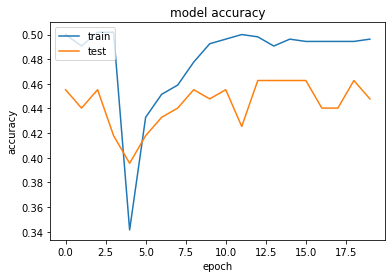

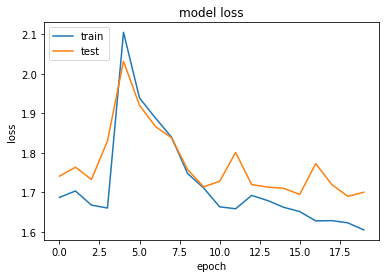

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**Results Summary:**
_Provide a brief summary of results obtained like model accuracy & other insights based on EDA & your interpretations_

1. The dataset is small. As it is told that we can only use the value of description field inside the jd_information field, the data gets even more reduced because lot of cases had empty description
2. In my work, I have shown how I go about first compiling the data in easy comprehensible format and then working upon feature extraction which is followed by training.
3. I have shown 2 ways i.e. using fine tuning the data on the pretrained BERT model and 2nd using simple CNN+LSTM network. Though I have not focussed on getting high accuracy because the dataset is highly unbalanced and is also small. My focus is how I can convert the data into simpler format so that it is easily understood by the machines. Fruther I have tried different latest approaches to extract features from the text that take semantic and contextual knowlegde into consideration.
4. Further, I can work on optimising the model even more (hyperparameter tuning, regularisation..etc) by exploring latest research and implementing them here for the good of our comapany.